In [26]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
os.getcwd()

'C:\\Users\\jaiveer.karra.1\\Desktop'

In [27]:
os.chdir("C:/Users/jaiveer.karra.1/Desktop")

In [28]:
df=pd.read_csv("perrin-freres-monthly-champagne-.csv")
df.head(10)

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
5,1964-06,3036.0
6,1964-07,2282.0
7,1964-08,2212.0
8,1964-09,2922.0
9,1964-10,4301.0


In [29]:
df.columns=["Month","Sales on Month"]


In [30]:
df.head()

,Month,Sales on Month
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [32]:
df.shape

(107, 2)

In [33]:
df.isnull().sum()

Month             1
Sales on Month    2
dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 2 columns):
Month             106 non-null object
Sales on Month    105 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.8+ KB


In [35]:
df.tail()

,Month,Sales on Month
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [37]:
df.drop(105,axis=0,inplace=True)

In [38]:
df.drop(106,axis=0,inplace=True)

In [39]:
df.tail()

,Month,Sales on Month
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [40]:
df.isnull().sum()

Month             0
Sales on Month    0
dtype: int64

In [41]:
df["Month"]=pd.to_datetime(df["Month"])

In [42]:
df.set_index("Month",inplace=True)

df.head()

,Sales on Month
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


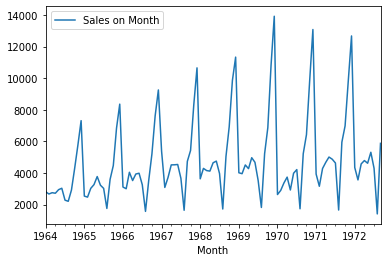

In [43]:
df.plot()

In [45]:
import statsmodels.api as sm

In [47]:
model=sm.tsa.statespace.SARIMAX(df['Sales on Month'],order=(1, 0, 0),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\jaiveer.karra.1\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [82]:
df["Forecast"]=results.predict(start=90, end=103,dynamic=True)

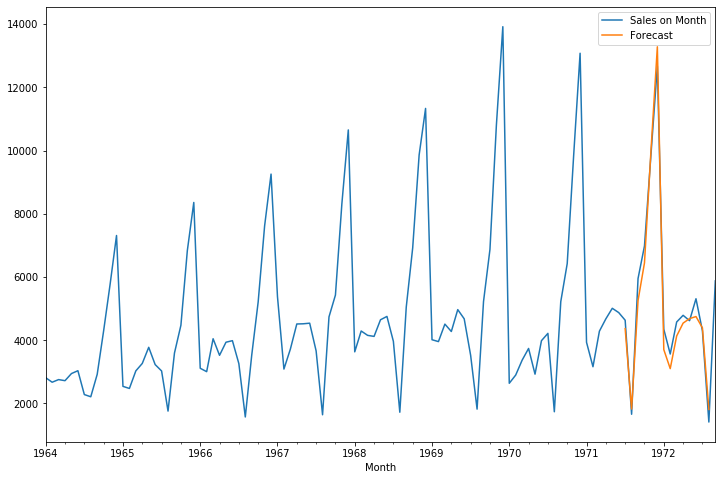

In [83]:
df[["Sales on Month","Forecast"]].plot(figsize=(12,8))

In [84]:
df.tail()

,Sales on Month,Forecast
Month,,
1972-05-01,4618.0,4683.966470
1972-06-01,5312.0,4748.832374
1972-07-01,4298.0,4391.913892
1972-08-01,1413.0,1810.549224
1972-09-01,5877.0,NaN


In [90]:
from pandas.tseries.offsets import DateOffset


In [91]:
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [92]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [93]:
future_datest_df

,Sales on Month,Forecast
1972-10-01,NaN,NaN
1972-11-01,NaN,NaN
1972-12-01,NaN,NaN
1973-01-01,NaN,NaN
1973-02-01,NaN,NaN
1973-03-01,NaN,NaN
1973-04-01,NaN,NaN
1973-05-01,NaN,NaN
1973-06-01,NaN,NaN
1973-07-01,NaN,NaN


In [94]:
future_df=pd.concat([df,future_datest_df])

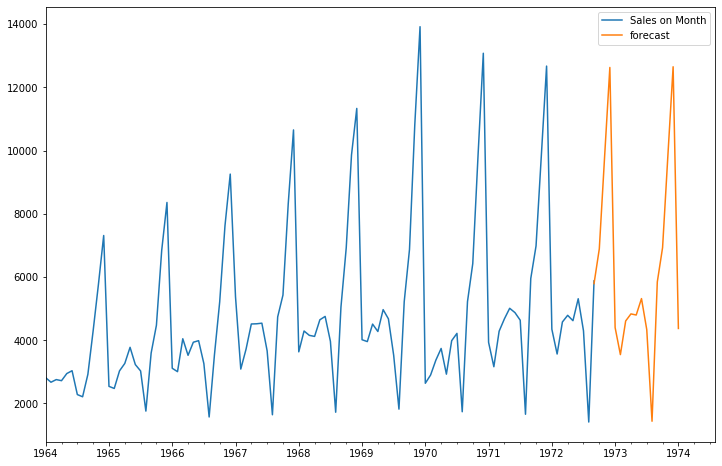

In [96]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales on Month', 'forecast']].plot(figsize=(12, 8))